Student Performance Indicator

Life cycle of Machine Learning Project

# Understanding the Problem Statement
# Data Collection
# Data Checks to perform
# Exploratory data analysis
# Data Pre-Processing
# Model Training
# Chosse best model



Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

Show the Top 5 Records

In [4]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataset

In [5]:
df.shape

(1000, 8)

3. Data Checks to perform

3.1 Check missing values
3.2 Check duplicates
3.3 Check data type
3.4 Check the number of unique values of each column
3.5 Check statistics of data set
3.6 Check various categories present in the different categorical column

In [6]:
# Check Missing Values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
# Check Duplicates
df.duplicated().sum()

0

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#Checking the number of unique value of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#Check statistics of data set
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3.7 Exploring the Data

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


3.8 Adding Columns for "Total Score" and "Average"

In [15]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


4. Exploring Data (Visalization)


4.1 Visualize average score distribution to make some conclusion
Histogram
Kernel Distribution Function (KDE)

4.1.1 Histogram and KDE

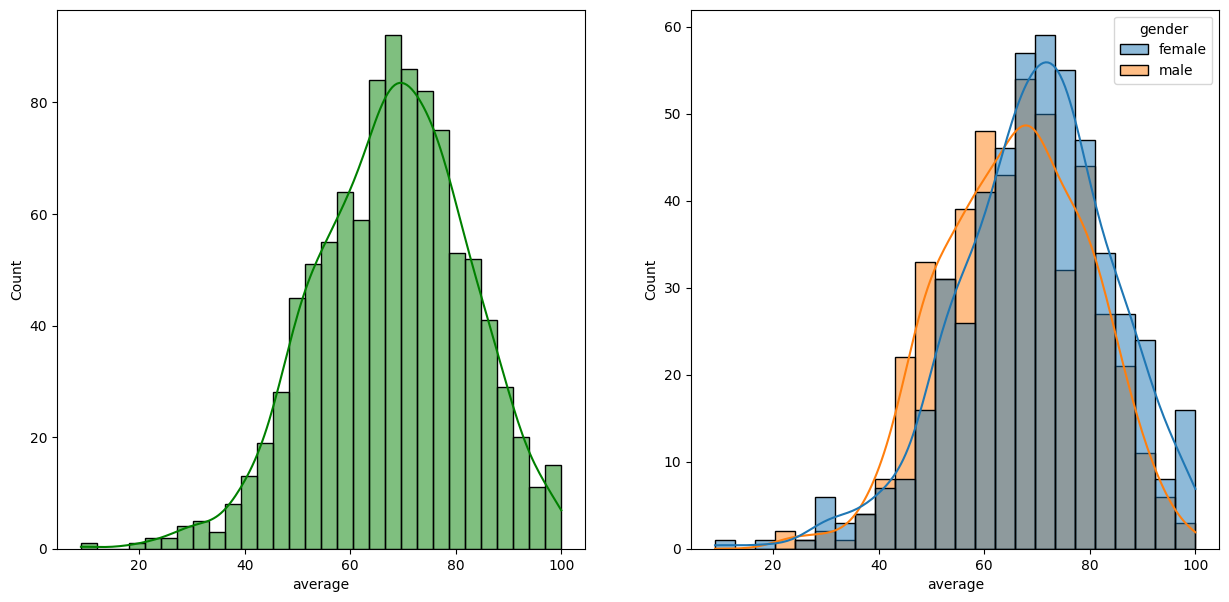

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

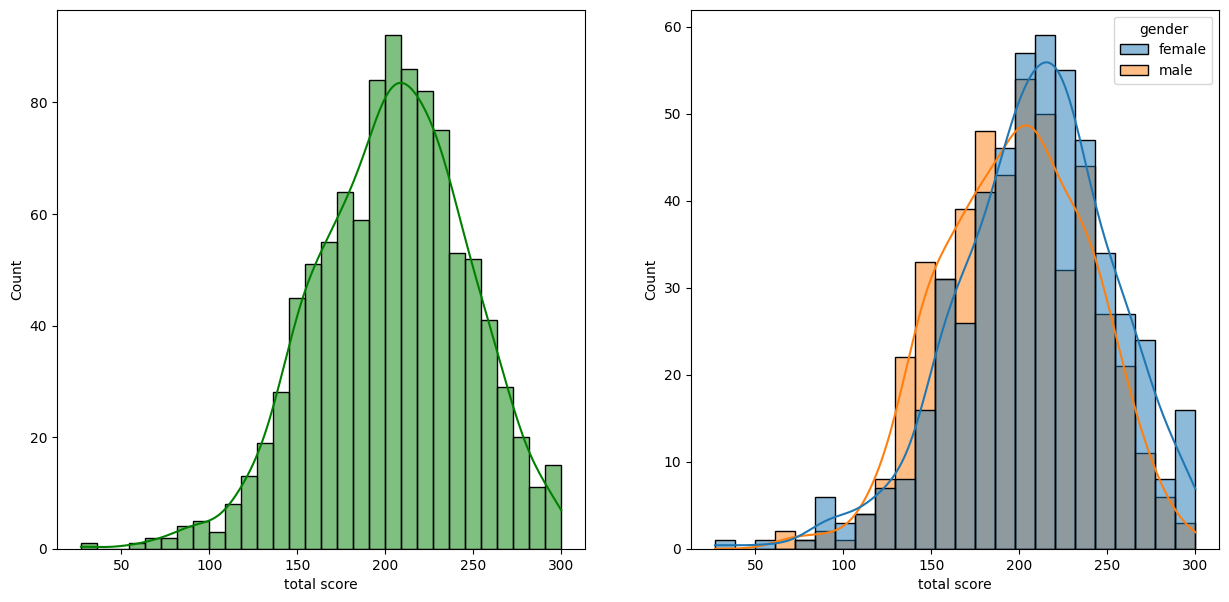

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

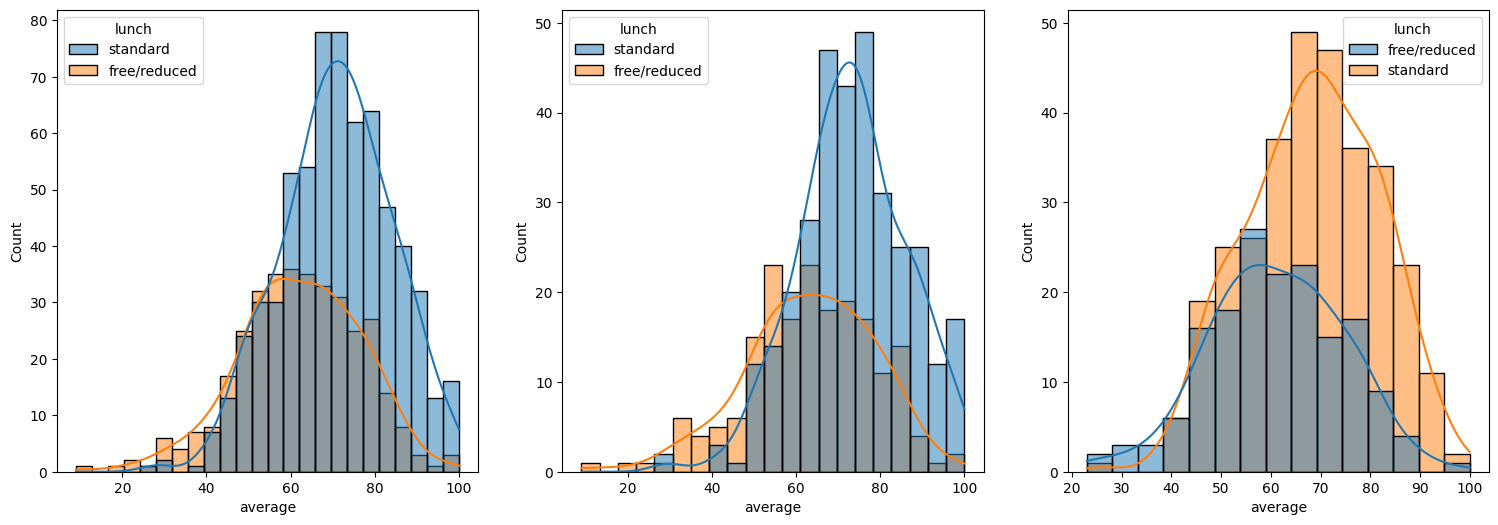

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

ValueError: Could not interpret value `parental level of education` for `hue`. An entry with this name does not appear in `data`.

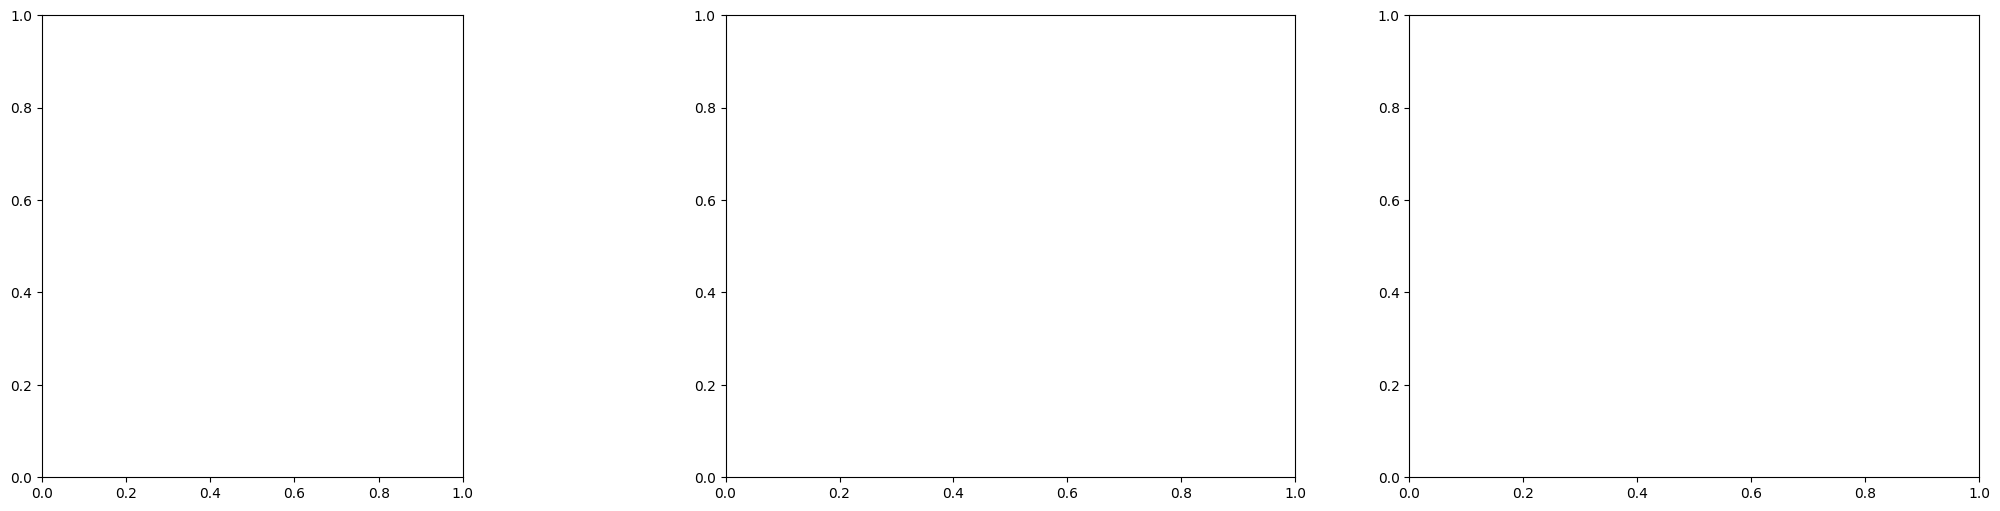

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

ValueError: Could not interpret value `race/ethnicity` for `hue`. An entry with this name does not appear in `data`.

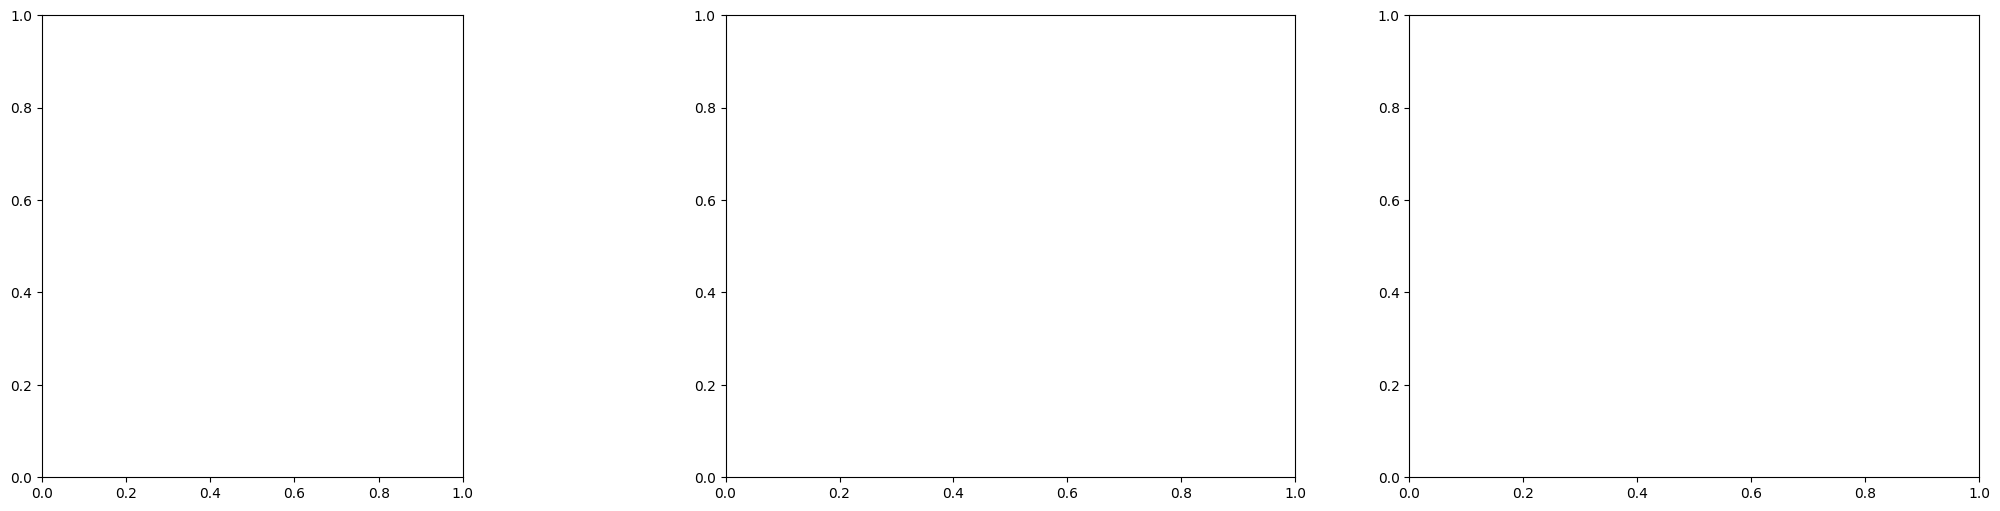

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

4.2 Maximum Score of Students in all 3 subjects

In [ ]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

In [26]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


4.3 Multivariate analysis using pieplot

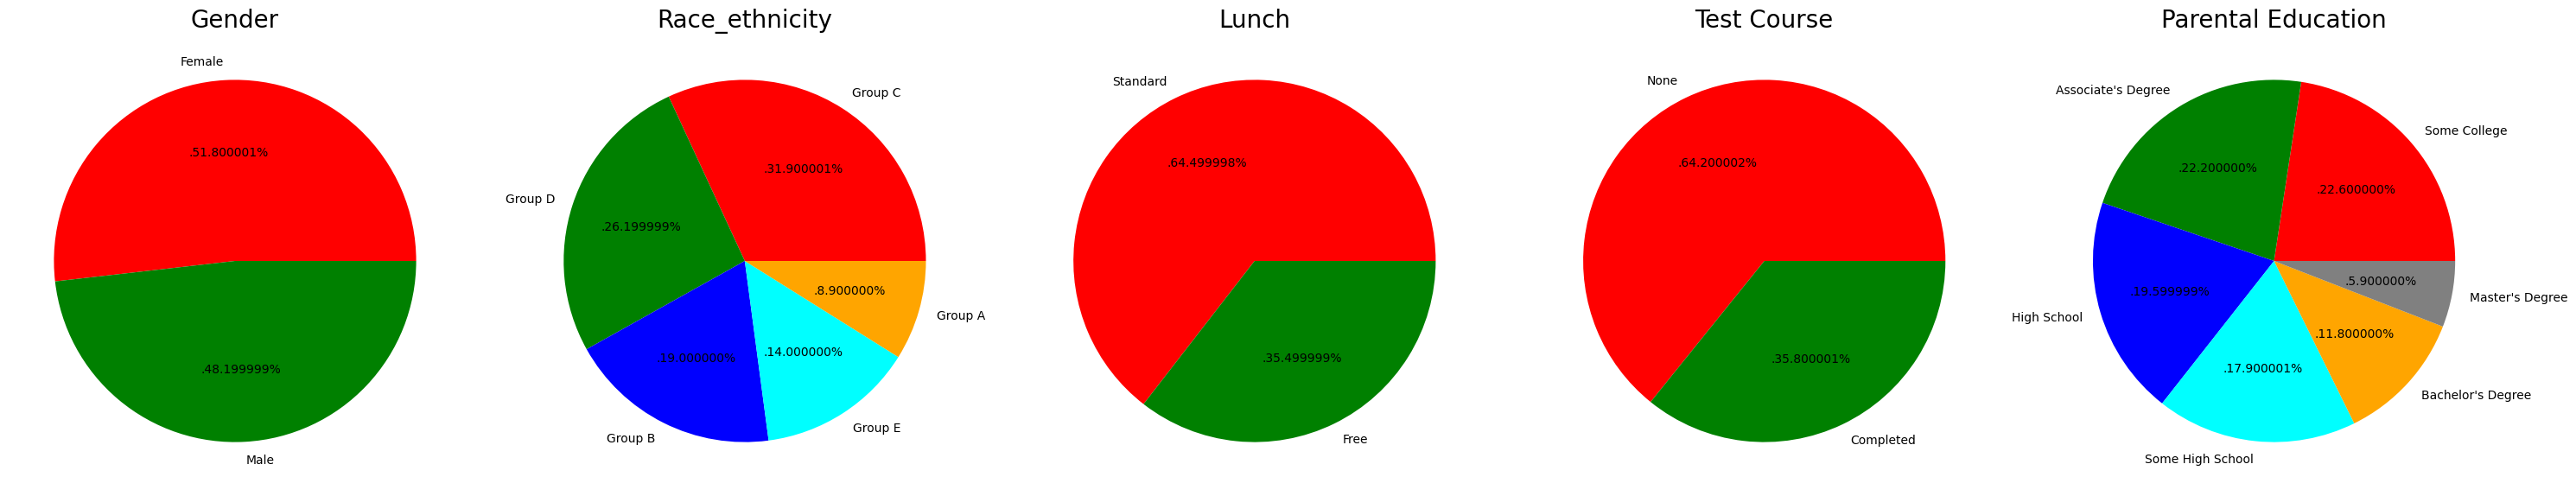

In [27]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

4.4 Feature Wise Visualization

4.4.1 Gender Column

Univariate Analysis (How is distribution of Gender?)

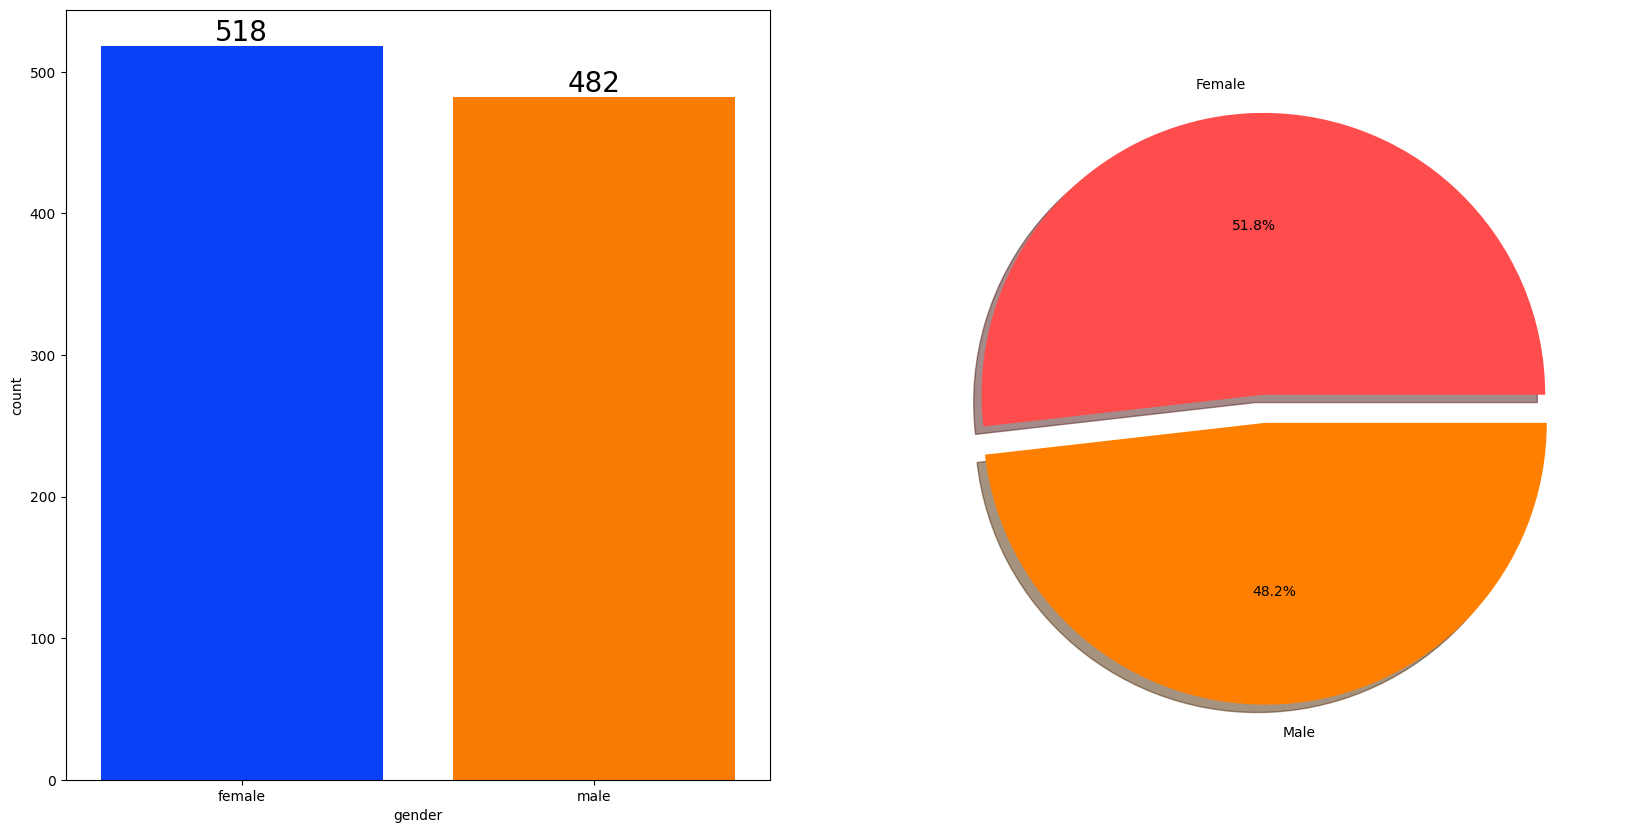

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Female','Male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS (does gender have any impact on student's performance?)

In [33]:
gender_group = df.groupby('gender').mean(numeric_only=True)
print(gender_group)

        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


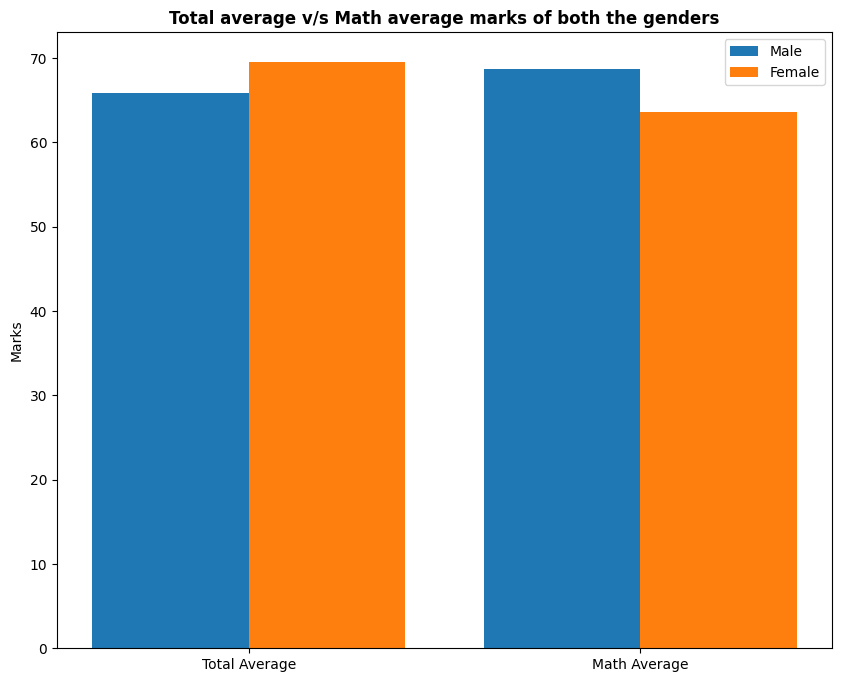

In [38]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

4.4.2 Race/Ethnicity Column

Univariate Analysis (Group wise distribution)

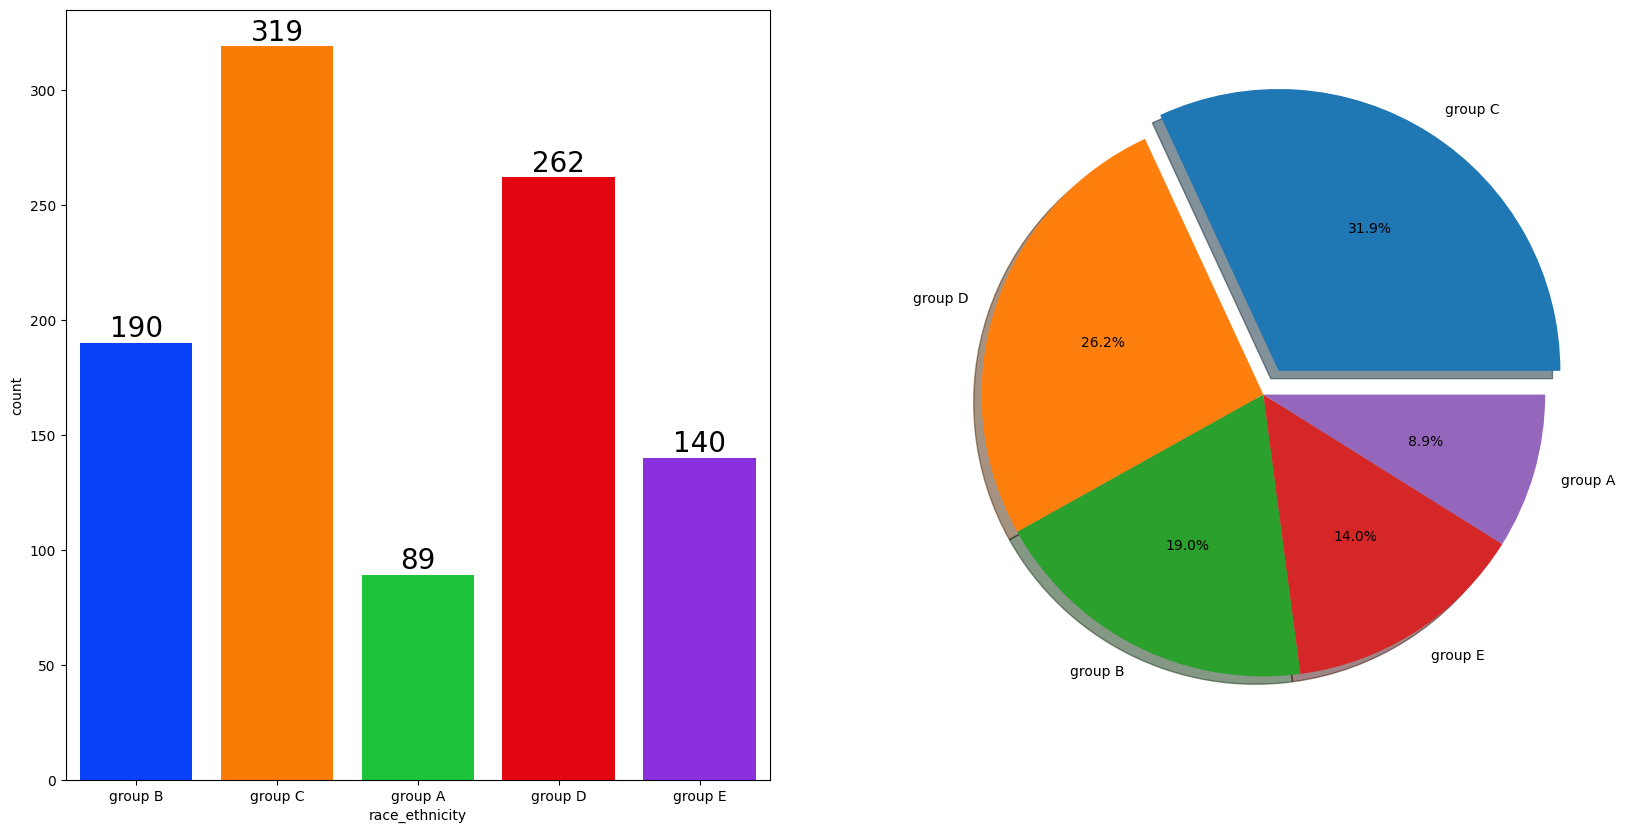

In [41]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Bivariate Analysis (does race/ethnicity have any impact on students' performance?)

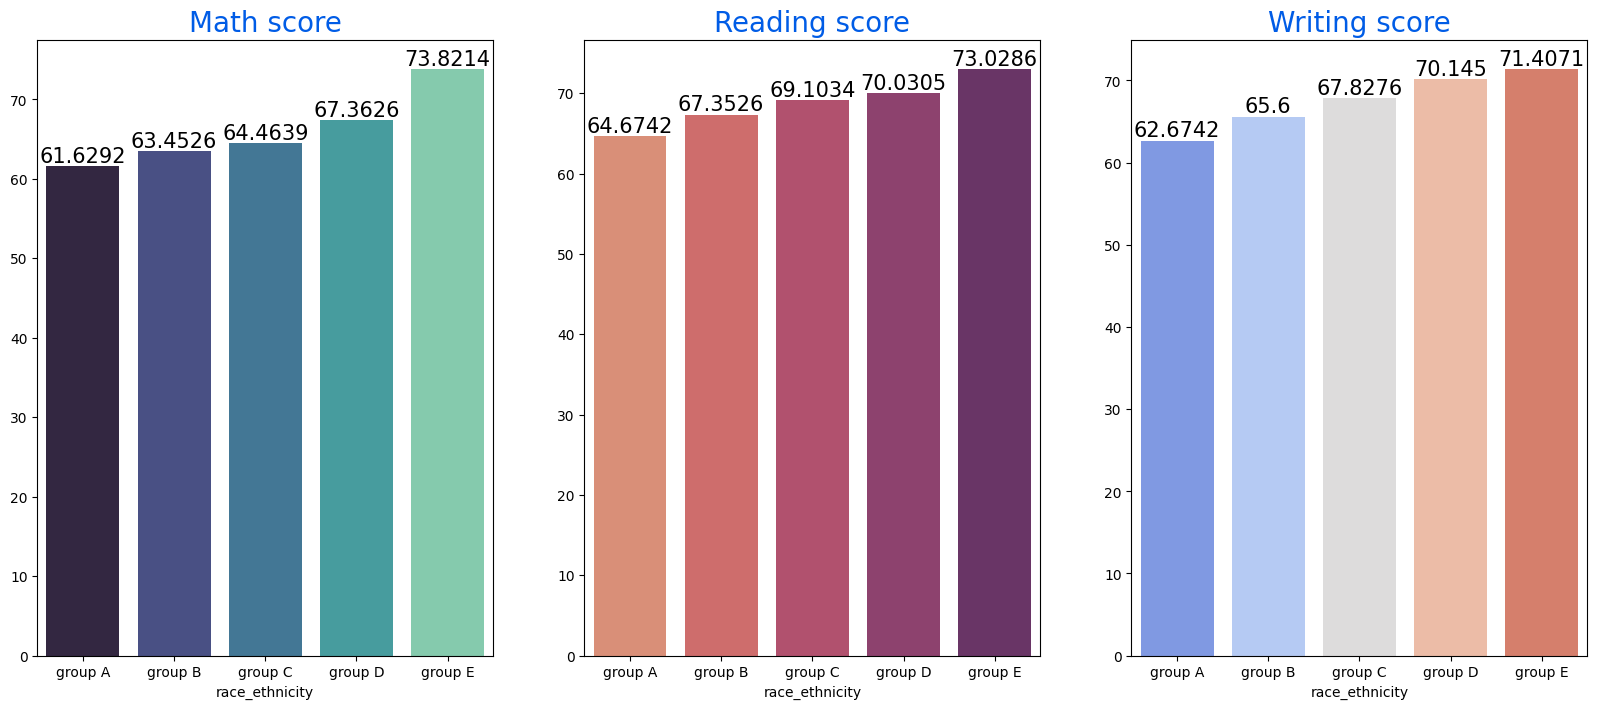

In [50]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

4.4.3 Parental Level of Education Column

Univariate Analysis (What are the educational background level of students' parents)

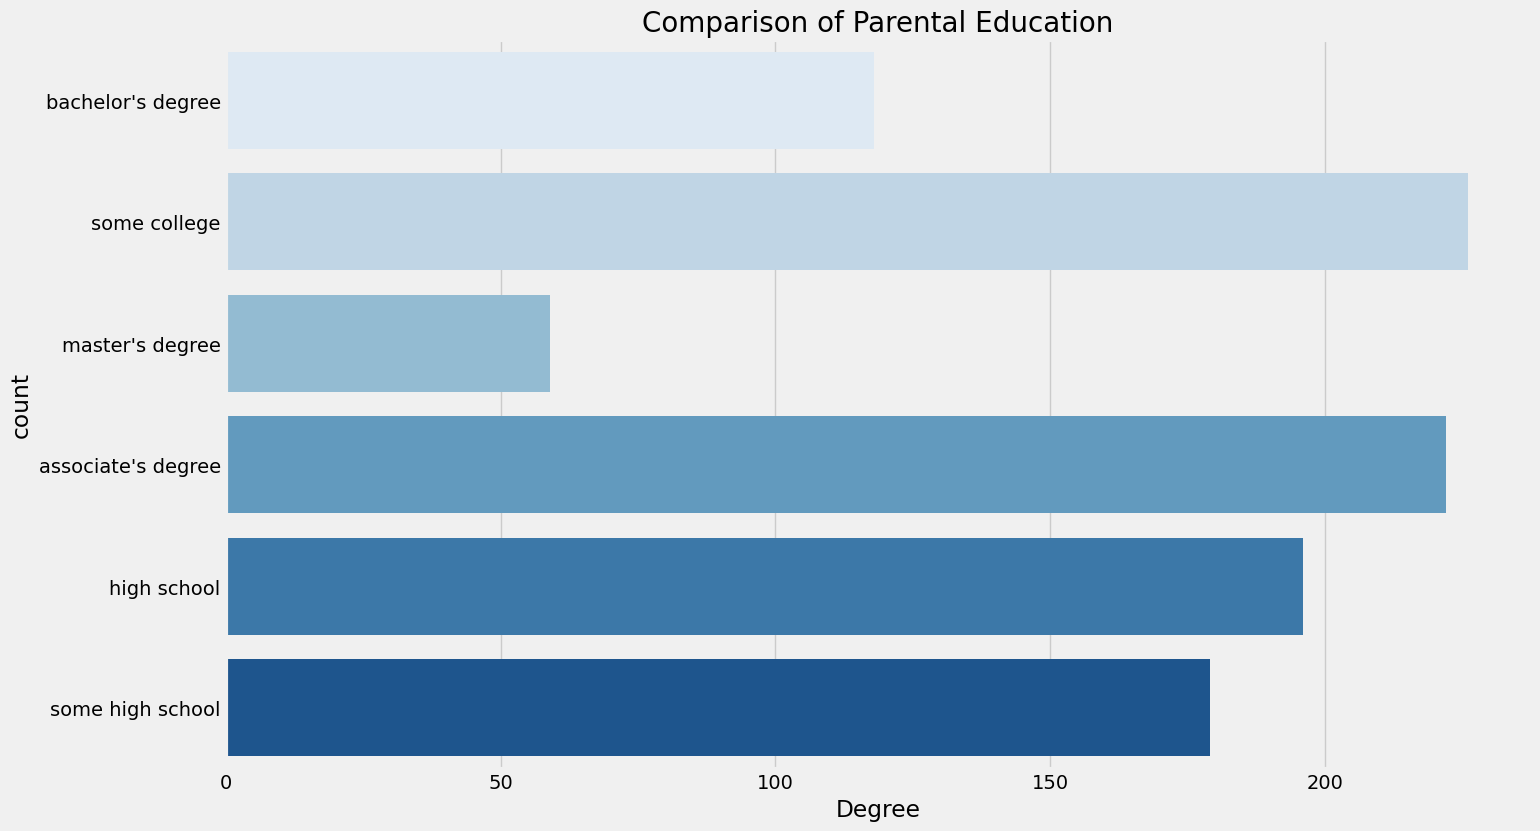

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count',)
plt.show()

Bivariate Analysis 

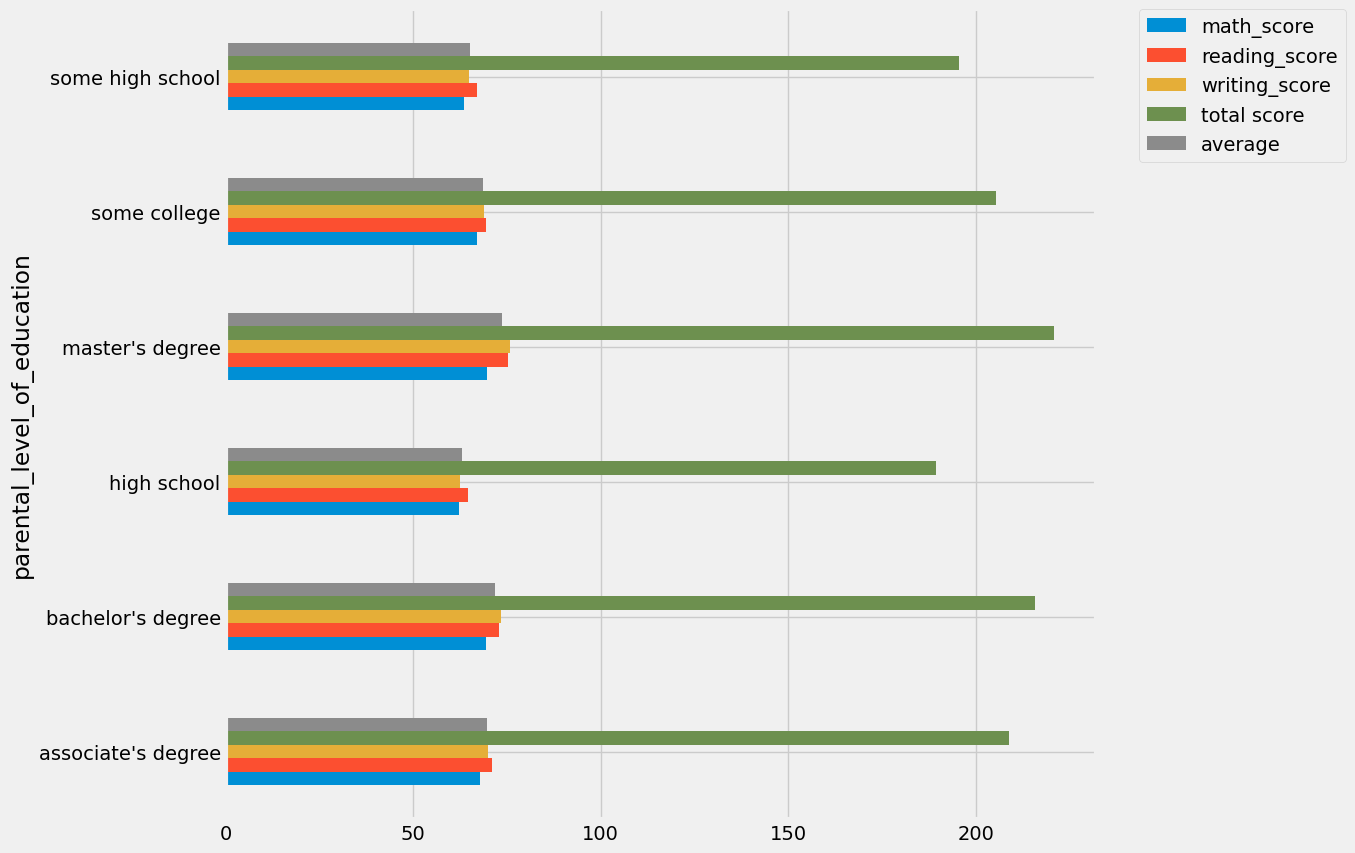

In [57]:
# Pass numeric_only=True to the aggregation function
df.groupby('parental_level_of_education').agg('mean', numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

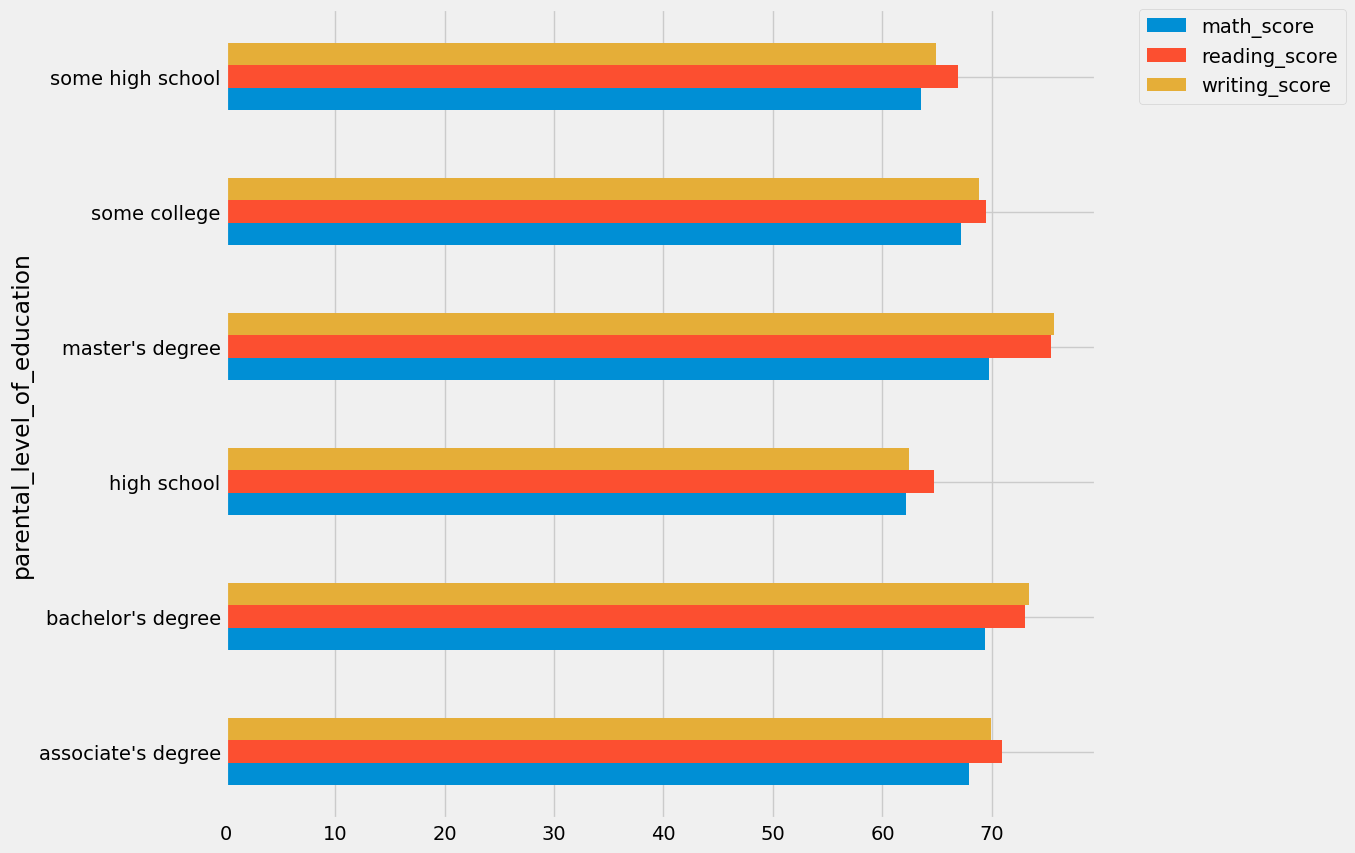

In [59]:
# Select only the score columns (or whatever your numeric columns are)
numeric_cols = ['math_score', 'reading_score', 'writing_score']

df.groupby('parental_level_of_education')[numeric_cols].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

4.4.4 Lunch Column

Univariate Analysis (which type of lunch is most common among students?)

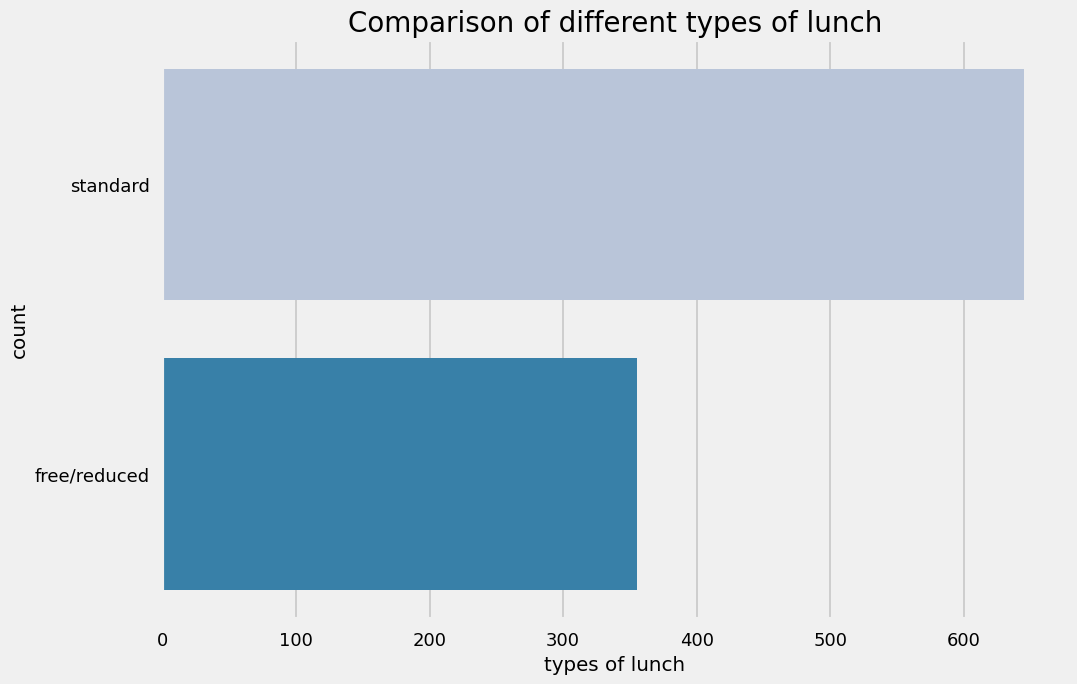

In [60]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Bivariate Analysis (Does lunch type intake have any impact on students' performance?)

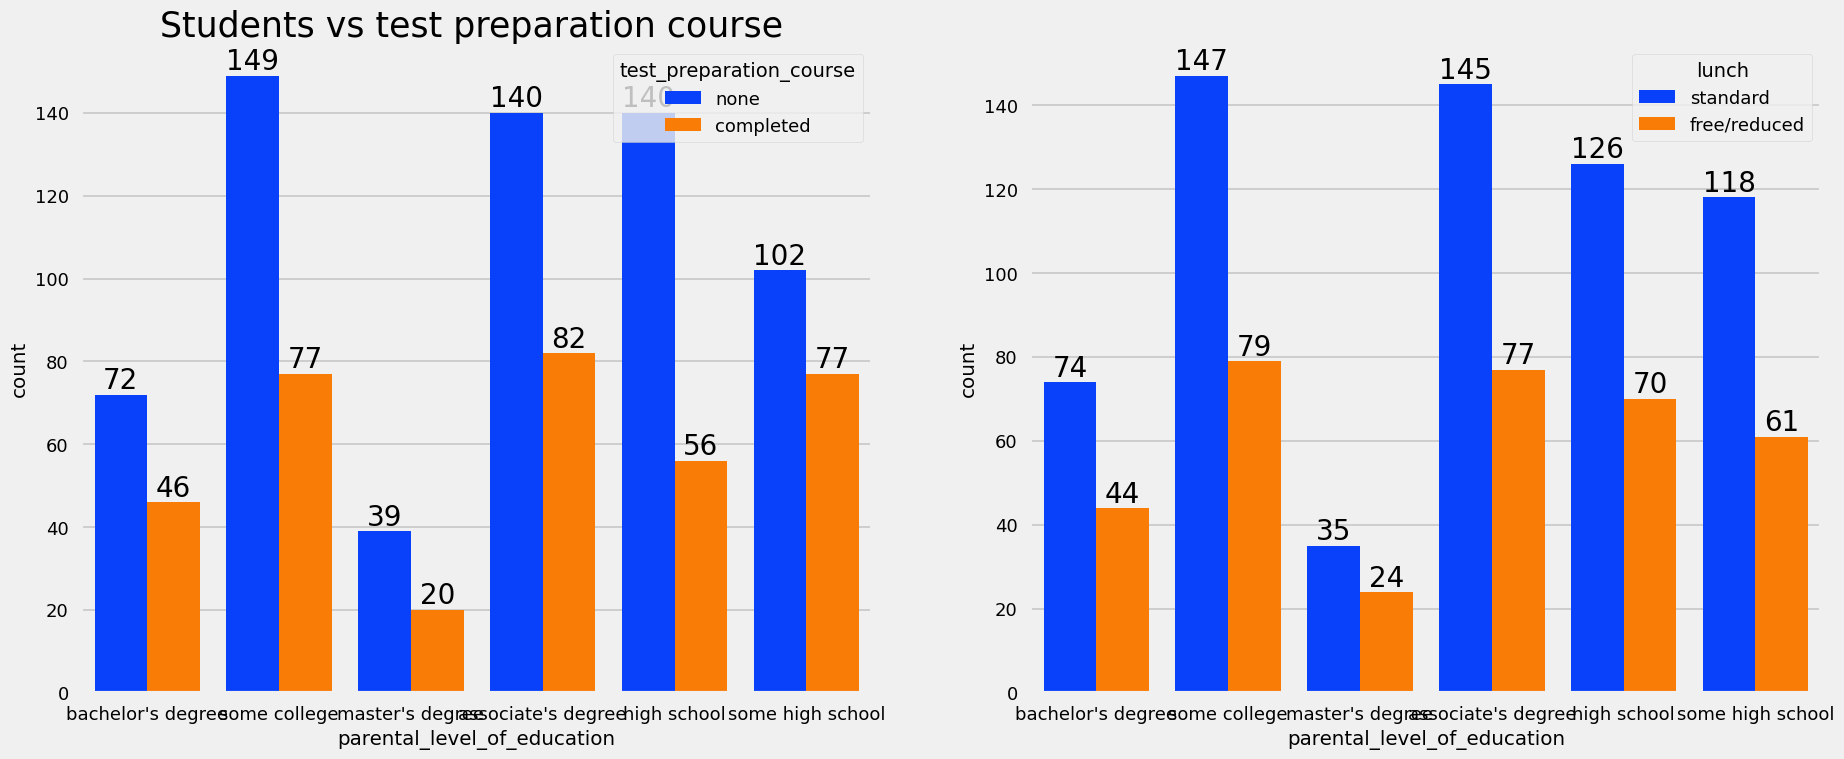

In [63]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

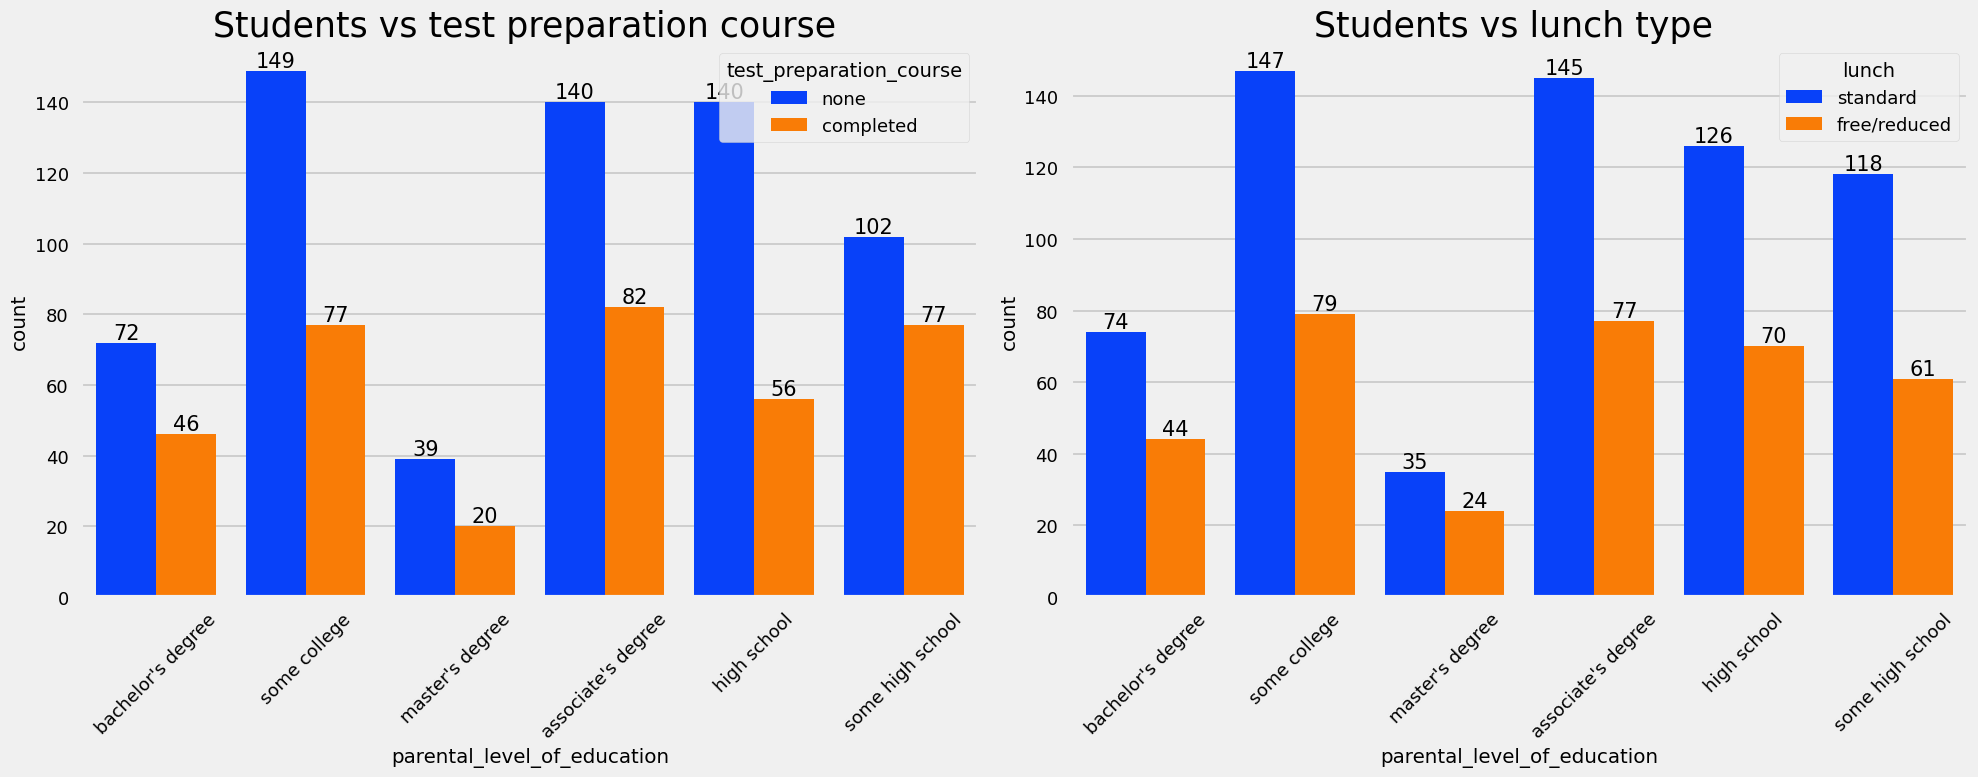

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is your cleaned DataFrame after the correction steps above

f,ax=plt.subplots(1,2,figsize=(20,8))

# --- Plot 1: Test Preparation Course ---
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
ax[0].tick_params(axis='x', rotation=45) # Rotate X-labels for better fit

# Add bar labels (counts)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
# --- Plot 2: Lunch Type ---
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
ax[1].set_title('Students vs lunch type ',color='black',size=25)
ax[1].tick_params(axis='x', rotation=45) # Rotate X-labels for better fit

# Add bar labels (counts)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
plt.show()

4.4.5 Test Preparation Course Column

Bivariate analysis (does test preparation course have any impact on students performance?)

<Axes: xlabel='lunch', ylabel='writing_score'>

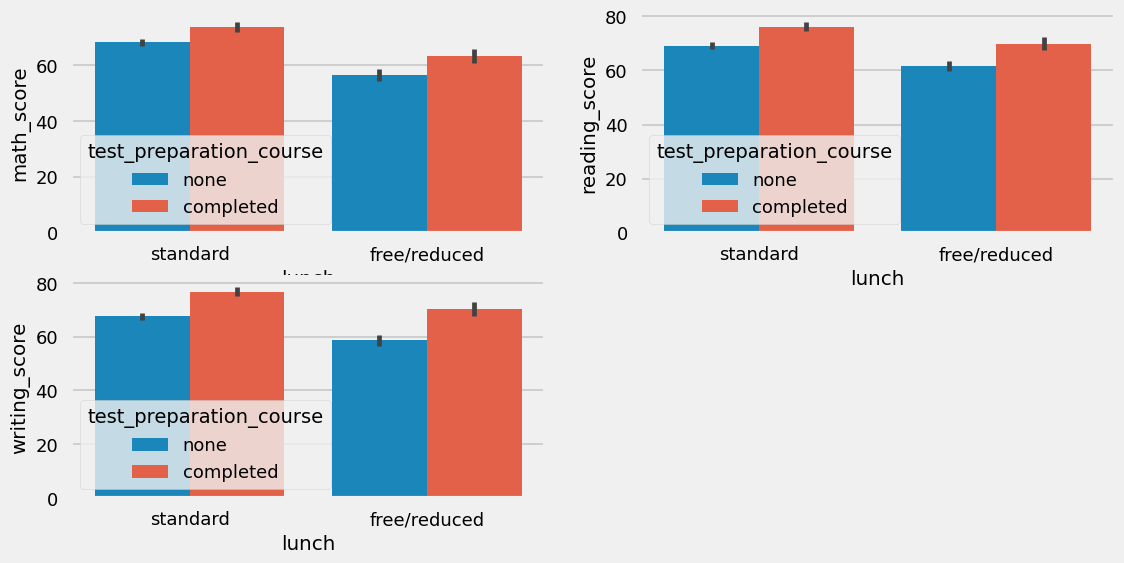

In [66]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

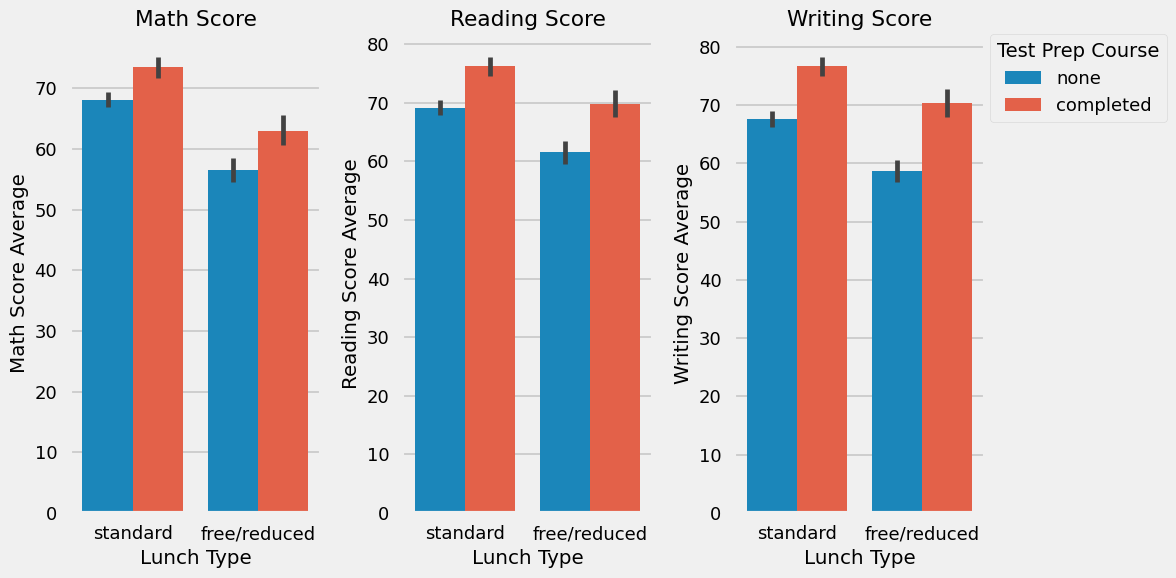

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming df is your DataFrame

plt.figure(figsize=(12,6))

plt.subplot(1,3,1) # Changed to 1 row, 3 columns for better fit on 12x6 figure
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Score') # Added titles for clarity
plt.ylabel('Math Score Average')
plt.xlabel('Lunch Type')
plt.legend([],[], frameon=False) # Remove legend from this subplot

plt.subplot(1,3,2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Score')
plt.ylabel('Reading Score Average')
plt.xlabel('Lunch Type')
plt.legend([],[], frameon=False) # Remove legend from this subplot

plt.subplot(1,3,3)
# The legend will be pulled from this plot
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Score')
plt.ylabel('Writing Score Average')
plt.xlabel('Lunch Type')

# Add a single, comprehensive legend outside all plots
plt.legend(
    title='Test Prep Course',
    bbox_to_anchor=(1.02, 1), # Place outside the right edge of the last subplot
    loc='upper left',
    borderaxespad=0.
)

plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust layout for space, excluding the legend area
plt.show()

4.4.6 Checking Outliers

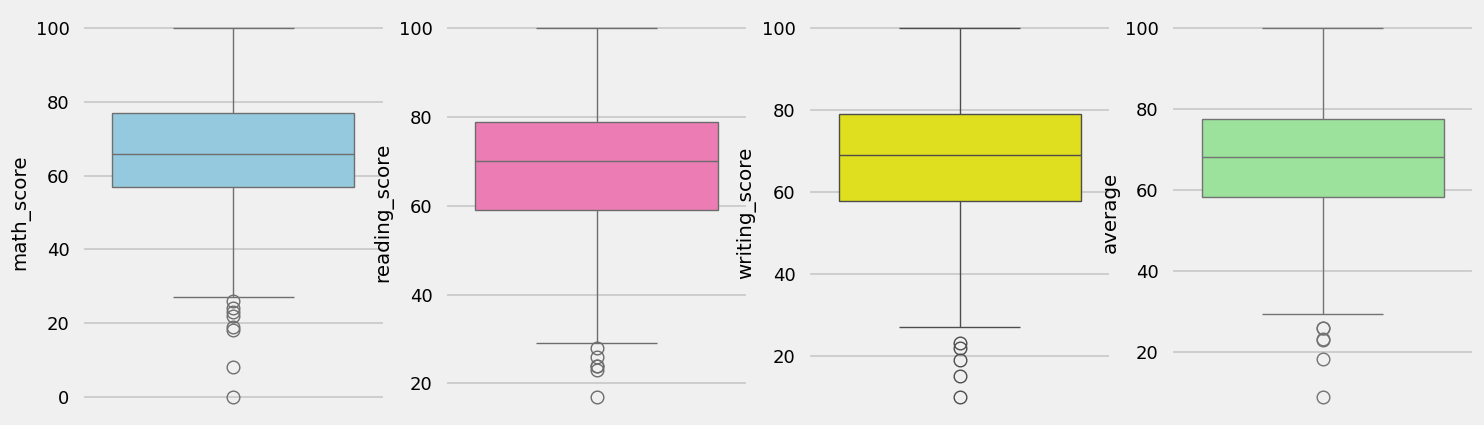

In [70]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 Multivariate Analysis Using Pairplot

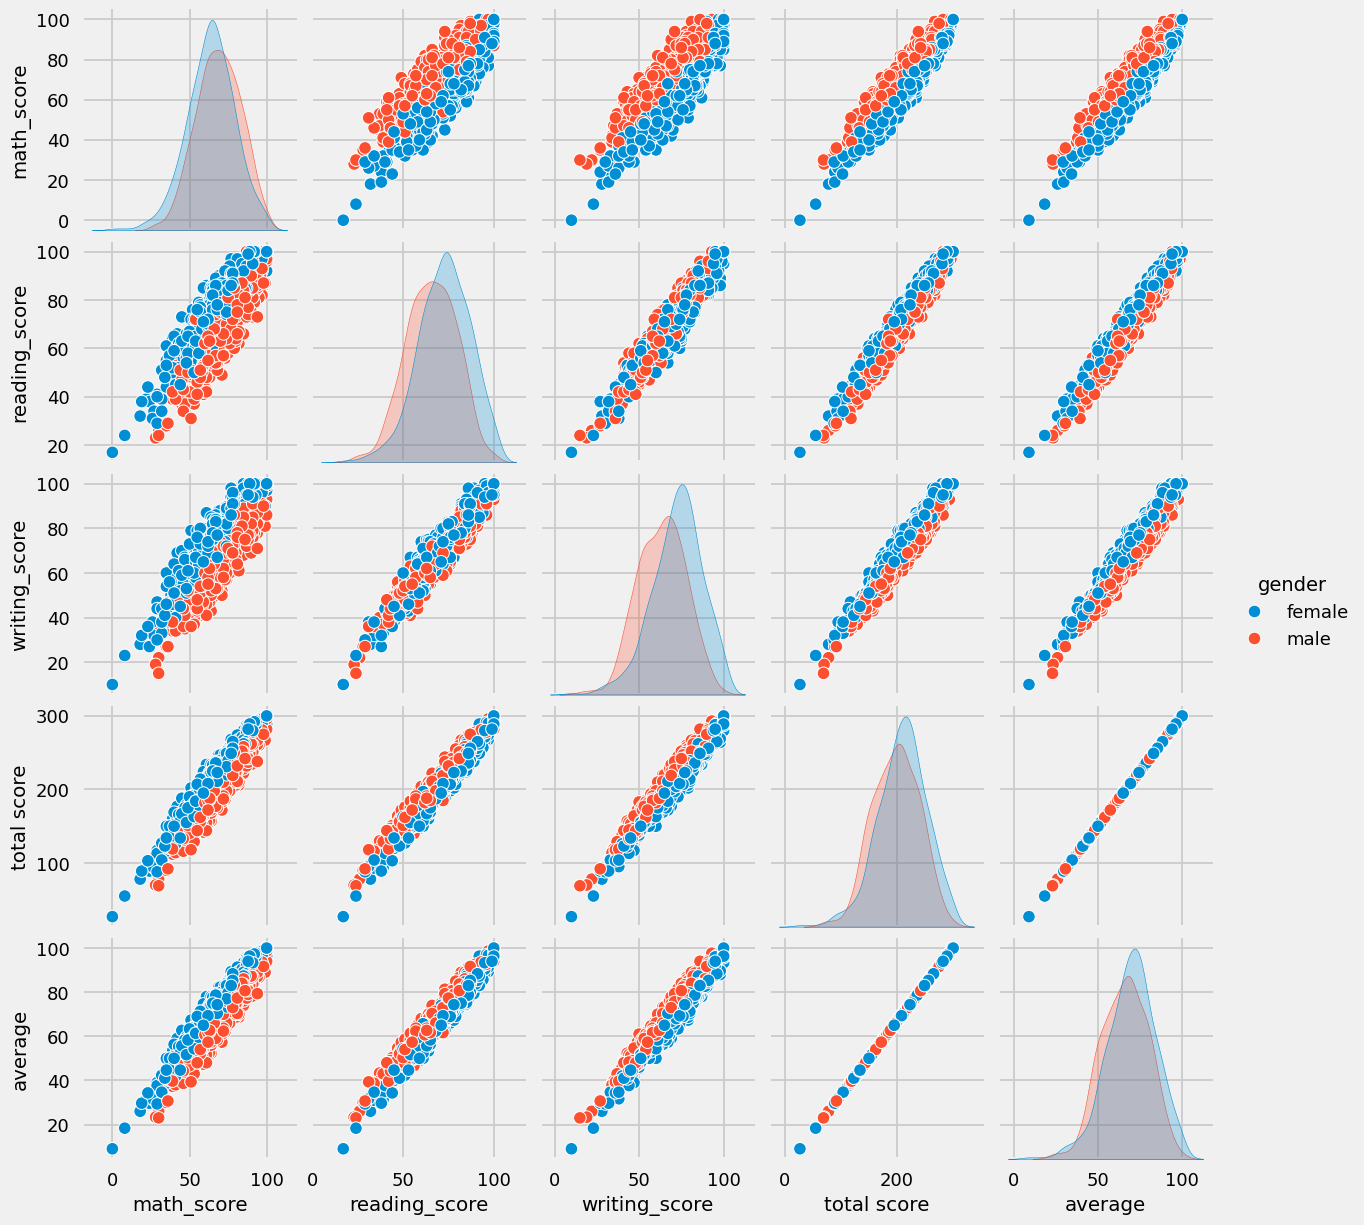

In [71]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insight to the above pair plot (from research).

## 1. Analysis of Student Performance Scores (Pair Plot)

The second image is a **Seaborn Pair Plot** (`image_cfb5b9.jpg`), which is an excellent visualization for examining relationships between multiple numerical variables and distributions of data segmented by a categorical variable (`gender`).

### A. Distribution and Correlation (Numerical Variables)

| Score Pair | Correlation & Pattern | Interpretation |
| :--- | :--- | :--- |
| **Diagonal Plots (Histograms)** | The distributions for all five scores/averages (`math_score`, `reading_score`, `writing_score`, `total_score`, `average`) appear to be **left-skewed** (mass is shifted to the right, towards higher scores). | This suggests that the majority of students in the dataset performed relatively well, with fewer students scoring low. |
| **All Scatter Plots** | There is an **extremely strong, positive linear correlation** between every pair of scores (e.g., math vs. reading, reading vs. writing, etc.). The strongest correlations are with `total_score` and `average`. | This is the most significant finding: a student who performs well in one subject is highly likely to perform well in the others. The scores are not independent. |
| **Total Score & Average** | The plots in the bottom row (vs. `total_score` and `average`) show perfectly linear patterns (slopes of 1 or close to it). | This is expected, as `total_score` and `average` are calculated directly from the three subject scores, serving as combined metrics. |

### B. Gender-Based Differences (Hue: `gender`)

The plots are colored by gender (`female` in blue, `male` in red/orange), revealing key performance differences:

| Comparison | Observation | Conclusion |
| :--- | :--- | :--- |
| **Math Score** | The **male (red)** cluster of points tends to be slightly higher, and the male distribution on the diagonal plot extends slightly further to the right. | **Males show a slight edge in Math Score.** |
| **Reading & Writing Scores** | The **female (blue)** cluster of points is consistently higher than the male cluster. The female distribution is clearly shifted higher on the diagonal plots for these two subjects. | **Females outperform males in Reading and Writing Scores.** |
| **Total Score & Average** | These combined scores show the male and female distributions are **very close**, but the visual center of the **female (blue)** points might be marginally higher due to their strength in reading and writing. | The combined effect balances out the gender differences, suggesting **overall performance is roughly equal** across genders, despite subject-specific strengths. |

***

## 2. Analysis of Parental Education and Test Prep (Count Plot)

The first image (`image_cfd802.png`) is a **Count Plot** that examines the count of students segmented by their parents' education level and whether they completed the test preparation course.

### A. Data Quality Issue (Labels)

* **Observation:** The labels on the x-axis for `parental_level_of_education` are merged (a potential data cleaning error), such as "some collegemaster's degree" and "associate's degreehigh school."
* **Impact:** This issue makes it impossible to accurately interpret the full counts for the individual categories of "master's degree" and "high school," as their data is combined with others. **The analysis below assumes the intent was to group by the primary category visible.**

### B. Impact of Test Preparation Course

| Parental Education Level | None (Blue) vs. Completed (Orange) | Interpretation |
| :--- | :--- | :--- |
| **bachelor's degree** | None (72) > Completed (46) | Test prep is less common among this group, possibly because parents/students feel it's less necessary. |
| **some college** | None (149) >> Completed (77) | A large proportion of students, but the "None" group is almost double the "Completed" group. |
| **master's degree** | None (39) > Completed (20) | Lower total student count, with "None" being about double "Completed." |
| **associate's degree** | None (140) >> Completed (82) | High overall student count, with a large number opting for "None." |
| **high school** | None (140) >> Completed (56) | High overall student count, but the ratio of "None" to "Completed" is highest here (2.5:1). |
| **some high school** | None (102) > Completed (77) | A high number of students, with a more balanced ratio compared to "high school." |

### C. Overall Conclusions from Count Plot

1.  **"None" is the Majority Choice:** In every single parental education category, **more students did NOT complete the test preparation course** than those who did. This is a consistent trend across the entire dataset.
2.  **Highest Counts:** The categories with the highest student enrollment are **'some college,' 'associate\'s degree,'** and **'high school.'**
3.  **Lowest Engagement:** The 'master\'s degree' group has the lowest total student count (39 + 20 = 59).

***

## 3. Robust Conclusion

The two plots together suggest a few robust hypotheses:

1.  **Performance is holistic:** Academic ability, as measured by these scores, is highly correlated across subjects.
2.  **Gender roles in subjects exist:** Females excel in Reading and Writing, while males hold a minor lead in Math.
3.  **Test Prep Strategy:** Despite the general consensus that test prep helps, the **vast majority of students across all parental education levels choose not to complete the course.** To be truly robust, this analysis would need a third plot: the **average scores of the 'completed' group vs. the 'none' group** to see if the students who skipped the course performed as well (or better/worse) than those who finished it.

Conclusion

1. Students performance is related with lunch, race and parental level of education
2. Female students lead in pass percentaage and also are top-scorers
3. Students performance is not much related with test preparation course
4. Finishing preparation course is beneficial